Linear SVR - RMSE: 5.3775945060610635
Linear SVR - R2 Score: 0.605658927913262
Polynomial SVR - RMSE: 6.0569038354880975
Polynomial SVR - R2 Score: 0.49973828580277946


c:\Users\divya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

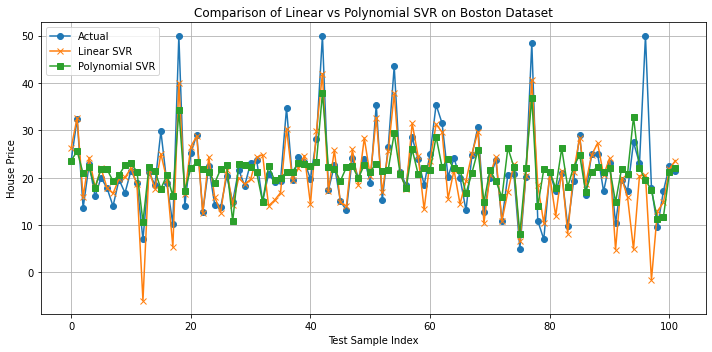

In [1]:
from sklearn.datasets import load_boston
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

# Load dataset
boston = load_boston()
X, y = boston.data, boston.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Kernel SVR
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train_scaled, y_train)
y_pred_linear = svr_linear.predict(X_test_scaled)

# Polynomial Kernel SVR
svr_poly = SVR(kernel='poly', degree=2)
svr_poly.fit(X_train_scaled, y_train)
y_pred_poly = svr_poly.predict(X_test_scaled)

# Evaluation
print("Linear SVR - RMSE:", mean_squared_error(y_test, y_pred_linear, squared=False))
print("Linear SVR - R2 Score:", r2_score(y_test, y_pred_linear))

print("Polynomial SVR - RMSE:", mean_squared_error(y_test, y_pred_poly, squared=False))
print("Polynomial SVR - R2 Score:", r2_score(y_test, y_pred_poly))

# Plot predictions
plt.figure(figsize=(10,5))
plt.plot(y_test, label="Actual", marker='o')
plt.plot(y_pred_linear, label="Linear SVR", marker='x')
plt.plot(y_pred_poly, label="Polynomial SVR", marker='s')
plt.title("Comparison of Linear vs Polynomial SVR on Boston Dataset")
plt.xlabel("Test Sample Index")
plt.ylabel("House Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()